In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression

Matplotlib is building the font cache; this may take a moment.


In [7]:
data = pd.read_csv("Car Data.csv")

In [8]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:
data.drop(columns=['torque'],inplace=True)

In [10]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [11]:
#preprocessing

data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:

data.duplicated().sum()

1189

In [14]:

data.drop_duplicates(inplace=True)

In [15]:
data.shape

(6718, 12)

In [16]:
data.describe()

,year,selling_price,km_driven,seats
count,6718.000000,6.718000e+03,6.718000e+03,6718.000000
mean,2013.609110,5.263196e+05,7.340230e+04,5.434653
std,3.900648,5.235398e+05,5.869980e+04,0.984230
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,5.000000
50%,2014.000000,4.200000e+05,6.822150e+04,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


In [18]:

def getBrandName(str):
  str= str.split(' ')[0]
  return (str.strip())


In [19]:
data['name']= data['name'].apply(getBrandName)

In [20]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [21]:
#deleteing rows with km driven greater than 3500000
data=data[data['km_driven']<3e5].reset_index(drop=True)
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6686,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
6687,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
6688,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
6689,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


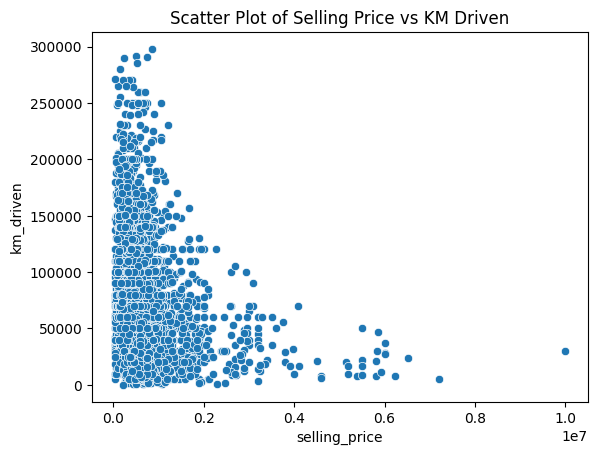

In [22]:
sns.scatterplot(x='selling_price', y='km_driven', data=data)
plt.title('Scatter Plot of Selling Price vs KM Driven')
plt.show()

In [23]:
data=data[data['selling_price']<6e6].reset_index(drop=True)
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6679,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
6680,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
6681,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
6682,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [24]:

data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [25]:
data.shape

(6684, 12)

In [26]:
def cleanData(value):
  value=value.split(" ")[0]
  value = value.strip()
  if value=='':
    value=0
  return float(value)

In [27]:
data['mileage']=data['mileage'].apply(cleanData)
data['engine']=data['engine'].apply(cleanData)
data['max_power']=data['max_power'].apply(cleanData)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6684 non-null   object 
 1   year           6684 non-null   int64  
 2   selling_price  6684 non-null   int64  
 3   km_driven      6684 non-null   int64  
 4   fuel           6684 non-null   object 
 5   seller_type    6684 non-null   object 
 6   transmission   6684 non-null   object 
 7   owner          6684 non-null   object 
 8   mileage        6684 non-null   float64
 9   engine         6684 non-null   float64
 10  max_power      6684 non-null   float64
 11  seats          6684 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 626.8+ KB


In [29]:
data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [30]:
# Maruti -1, Skoda -2, Honda -3, Hyundai -4, Toyota-5, 'Ford-6', 'Renault-7',
# Mahindra-8, Tata-9, 'Chevrolet-10', 'Datsun-11', 'Jeep-12', 'Mercedes-Benz-13',
# Mitsubishi-14',  Audi-15', 'Volkswagen-16', 'BMW-17', 'Nissan-18', 'Lexus-19',
# Jaguar-20', 'Land-21', 'MG-22', 'Volvo-23', 'Daewoo-24', 'Kia-25', 'Fiat-26', 'Force-27',
# Ambassador-28', 'Ashok-29', 'Isuzu-30', 'Opel-31'

data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3516\525601704.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
C:\Users\User\AppData\Local\Temp\ipykernel_3516\525601704.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

In [31]:
data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [32]:
# Diesel - 1, Petrol - 2, LPG - 3,CNG - 4
data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3516\1989786855.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4],inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_3516\1989786855.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [30]:
data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [33]:
# Manual -0,Automatic -1
data['transmission'].replace(['Manual', 'Automatic'],[0,1],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3516\3793358658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['transmission'].replace(['Manual', 'Automatic'],[0,1],inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_3516\3793358658.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[

In [32]:
data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [34]:
#Individual -0,Dealer -1,TrustmarkDealer-3
data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[0,1,2],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3516\2214484384.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[0,1,2],inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_3516\2214484384.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

In [34]:
data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [35]:
#First -1,Second-2,third -3,Fourth -4,Test -5
data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],[1,2,3,4,5],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3516\3037293558.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
C:\Users\User\AppData\Local\Temp\ipykernel_3516\3037293558.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['own

In [68]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,0,0,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,0,0,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,0,0,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,0,0,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,0,0,1,16.10,1298.0,88.20,5.0


In [69]:
X = data.drop(columns=['selling_price'])
y=data['selling_price']

In [70]:
from sklearn.model_selection import train_test_split


In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [72]:
#model creation
model = LinearRegression()

In [73]:
X_train.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
5345,6,2014,60000,1,0,0,1,25.01,1498.0,89.75,5.0
6677,1,2017,80000,2,0,0,1,20.51,998.0,67.04,5.0
335,3,2012,40000,2,1,0,1,18.50,1198.0,86.80,5.0
1299,4,2014,70000,2,0,0,2,18.60,1197.0,81.83,5.0
1289,1,2017,80000,1,0,0,1,24.30,1248.0,88.50,5.0


In [75]:
y_train.head()

5345    425000
6677    360000
335     325000
1299    565000
1289    775000
Name: selling_price, dtype: int64

In [76]:
model.fit(X_train,y_train)

LinearRegression()

In [77]:
prediction = model.predict(X_test)

In [78]:
#Accuracy of LinearRegression
from sklearn.metrics import r2_score
score = r2_score(y_test,prediction)
print(score*100)

63.787318713986416


In [79]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
prediction2=randomForest.predict(X_test)

In [81]:
#Accuracy of RandomForest

score = r2_score(y_test,prediction2)
print(score*100)


82.55136142904807


In [52]:
import pickle

In [53]:
#Saving the  Accurate Model using joblib
with open('RandomForestModel.pkl', 'wb') as file:
    pickle.dump(randomForest, file)

In [82]:
y_test.head()

6193    800000
6335    500000
3713    395000
980     844999
4376    155000
Name: selling_price, dtype: int64

In [83]:
X_test.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
6193,4,2017,15000,1,0,0,1,23.90,1582.0,126.2,5.0
6335,9,2018,25000,2,0,0,1,23.84,1199.0,84.0,5.0
3713,1,2017,25000,2,0,0,1,21.63,998.0,67.0,5.0
980,1,2017,70000,1,1,0,1,28.09,1248.0,88.5,5.0
4376,1,2014,80000,2,0,0,1,16.80,796.0,34.2,8.0


In [84]:
input = pd.DataFrame({
    'name':4,
    'year':2017,
    'km_driven':15000,
    'fuel':1,
    'seller_type':0,
    'transmission':0,
    'owner':1,
    'mileage':23.90,
    'engine':1582.0,
    'max_power':126.2,
    'seats':5.0
},index=[0])

In [85]:
model.predict(input)

array([1020390.86453553])

In [86]:
randomForest.predict(input)

array([803999], dtype=int64)

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Choose a range of values for n_estimators
n_estimators_values = [10, 50, 100, 200, 300]

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Loop through each value of n_estimators
for n_estimators in n_estimators_values:
    # Create Random Forest model with current value of n_estimators
    model = RandomForestClassifier(n_estimators=n_estimators)
    
    # Perform cross-validation and compute mean score
    scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Find the index of the best n_estimators value
best_index = np.argmax(cv_scores)
best_n_estimators = n_estimators_values[best_index]

print("Best n_estimators value:", best_n_estimators)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only

Best n_estimators value: 300
